In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

# Class distributions

### Normalized (%)

In [4]:
classifier_utils.get_projects_class_distribution(projects)

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,43.87,29.25,8.43,1.32,0.92,16.07,0.13
1,apache/directory-server,47.39,51.23,0.15,0.00,0.00,1.23,0.00
2,android/platform_frameworks_base,70.77,7.64,9.02,2.68,1.42,8.13,0.33
3,freenet/fred,40.42,16.50,23.32,6.23,0.49,12.94,0.10
4,alexo/wro4j,30.70,14.77,28.65,0.88,1.02,23.61,0.37
5,apache/lucene-solr,25.05,26.59,20.33,5.24,0.31,21.66,0.82
6,elastic/elasticsearch,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,getrailo/railo,31.99,37.76,8.74,7.17,0.35,13.81,0.17
8,atlasapi/atlas,24.04,44.50,12.40,5.37,0.90,12.53,0.26
9,hibernate/hibernate-orm,23.88,20.11,31.15,7.40,1.12,14.11,2.23


### Count

In [5]:
classifier_utils.get_projects_class_distribution(projects, False)

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,333,222,64,10,7,122,1
1,apache/directory-server,309,334,1,0,0,8,0
2,android/platform_frameworks_base,1741,188,222,66,35,200,8
3,freenet/fred,409,167,236,63,5,131,1
4,alexo/wro4j,420,202,392,12,14,323,5
5,apache/lucene-solr,244,259,198,51,3,211,8
6,elastic/elasticsearch,0,0,0,0,0,0,0
7,getrailo/railo,183,216,50,41,2,79,1
8,atlasapi/atlas,188,348,97,42,7,98,2
9,hibernate/hibernate-orm,171,144,223,53,8,101,16


# Decision Tree

### Base classifier

In [6]:
dt = DecisionTreeClassifier(min_samples_split=5, random_state=99)
projects_results = classifier_utils.ProjectsResults(dt, projects, non_features_columns)

In [7]:
projects_results.get_report_df(include_overall=True)

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,apache__lucene-solr,1256,974,0.57300,0.56800,0.56900,0.56800,0.2660,113.514
1,apache__directory-server,845,652,0.92200,0.92300,0.92300,0.92300,0.5120,80.240
2,CCI-MIT__XCoLab,5512,3757,0.97300,0.97100,0.97200,0.97100,0.5730,69.392
3,getrailo__railo,815,572,0.63600,0.63100,0.63300,0.63100,0.3780,67.130
4,jgralab__jgralab,2072,1802,0.82300,0.81900,0.82000,0.81900,0.4910,66.667
5,hibernate__hibernate-orm,1000,716,0.50600,0.50300,0.50400,0.50300,0.3110,61.435
6,alexo__wro4j,1663,1368,0.49400,0.49500,0.49400,0.49500,0.3070,61.190
7,CloudStack-extras__CloudStack-archive,1424,1106,0.69900,0.70000,0.69900,0.70000,0.4370,60.248
8,Ramblurr__Anki-Android,892,759,0.67800,0.68100,0.67900,0.68100,0.4390,55.255
9,freenet__fred,1268,1012,0.60600,0.60600,0.60500,0.60600,0.4040,49.878


### Inspect project

In [8]:
project = projects_results.get_project('alexo__wro4j')

,precision,recall,f1-score,support
Combination,0.516746,0.551020,0.533333,392.000000
ConcatenationV1V2,0.071429,0.083333,0.076923,12.000000
ConcatenationV2V1,0.066667,0.071429,0.068966,14.000000
Manual,0.488372,0.455108,0.471154,323.000000
None,0.000000,0.000000,0.000000,5.000000
Version 1,0.561033,0.569048,0.565012,420.000000
Version 2,0.384211,0.361386,0.372449,202.000000
accuracy,0.494883,0.494883,0.494883,0.494883
macro avg,0.298351,0.298761,0.298262,1368.000000
weighted avg,0.493672,0.494883,0.493916,1368.000000


None

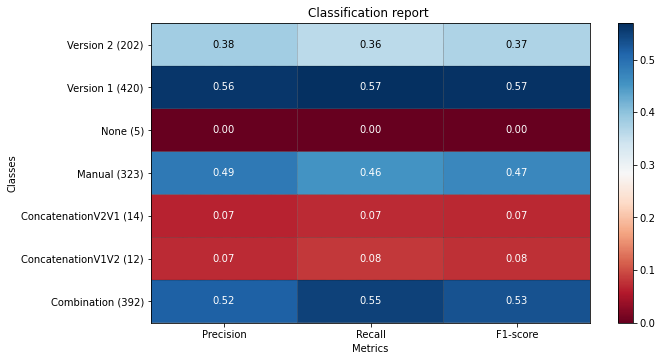

In [9]:
display(project.get_scores_df())
display(classifier_utils.plot_classification_report(project.scores))

### Tunning hyperparameters (TODO)

# Random Forest

### Base classifier

In [10]:
rf = RandomForestClassifier(random_state=99)
projects_results = classifier_utils.ProjectsResults(rf, projects, non_features_columns)

In [11]:
projects_results.get_report_df()

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
5,apache__lucene-solr,1256,974,0.643,0.650,0.644,0.650,0.266,144.402
4,alexo__wro4j,1663,1368,0.569,0.581,0.572,0.581,0.307,89.286
9,hibernate__hibernate-orm,1000,716,0.574,0.589,0.574,0.589,0.311,89.238
7,getrailo__railo,815,572,0.691,0.705,0.697,0.705,0.378,86.574
10,CloudStack-extras__CloudStack-archive,1424,1106,0.801,0.807,0.802,0.807,0.437,84.679
1,apache__directory-server,845,652,0.921,0.925,0.923,0.925,0.512,80.539
24,jgralab__jgralab,2072,1802,0.871,0.873,0.871,0.873,0.491,77.853
26,CCI-MIT__XCoLab,5512,3757,0.970,0.974,0.971,0.974,0.573,69.902
0,Ramblurr__Anki-Android,892,759,0.717,0.744,0.724,0.744,0.439,69.670
3,freenet__fred,1268,1012,0.673,0.679,0.672,0.679,0.404,67.971


### Inspect project

In [12]:
project = projects_results.get_project('alexo__wro4j')

,precision,recall,f1-score,support
Combination,0.588764,0.668367,0.626045,392.00000
ConcatenationV1V2,0.000000,0.000000,0.000000,12.00000
ConcatenationV2V1,0.333333,0.142857,0.200000,14.00000
Manual,0.552189,0.507740,0.529032,323.00000
None,0.000000,0.000000,0.000000,5.00000
Version 1,0.614894,0.688095,0.649438,420.00000
Version 2,0.527027,0.386139,0.445714,202.00000
accuracy,0.581140,0.581140,0.581140,0.58114
macro avg,0.373744,0.341885,0.350033,1368.00000
weighted avg,0.569104,0.581140,0.571554,1368.00000


None

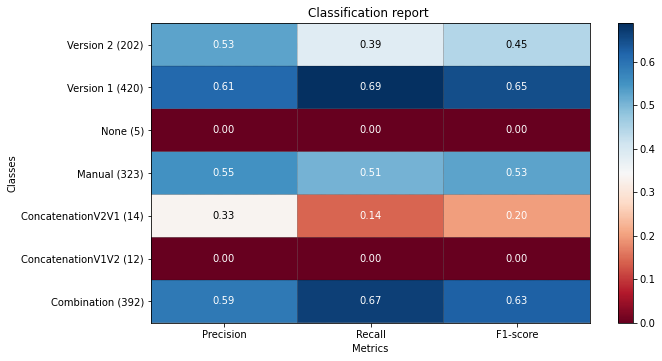

In [13]:
display(project.get_scores_df())
display(classifier_utils.plot_classification_report(project.scores))

### Tunning hyperparameters (TODO)

# Random Forest (XGBoost)

### Base classifier

In [14]:
rf_xg = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')
projects_results = classifier_utils.ProjectsResults(rf_xg, projects, non_features_columns)

In [15]:
projects_results.get_report_df()

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
5,apache__lucene-solr,1256,974,0.599,0.603,0.599,0.603,0.266,126.641
9,hibernate__hibernate-orm,1000,716,0.564,0.582,0.562,0.582,0.311,86.996
7,getrailo__railo,815,572,0.669,0.692,0.678,0.692,0.378,83.333
1,apache__directory-server,845,652,0.909,0.913,0.911,0.913,0.512,78.144
4,alexo__wro4j,1663,1368,0.531,0.547,0.527,0.547,0.307,78.095
26,CCI-MIT__XCoLab,5512,3757,0.964,0.972,0.968,0.972,0.573,69.577
24,jgralab__jgralab,2072,1802,0.803,0.809,0.798,0.809,0.491,64.633
0,Ramblurr__Anki-Android,892,759,0.678,0.717,0.692,0.717,0.439,63.363
3,freenet__fred,1268,1012,0.656,0.659,0.649,0.659,0.404,63.081
10,CloudStack-extras__CloudStack-archive,1424,1106,0.678,0.684,0.663,0.684,0.437,56.729


### Inspect project

In [16]:
project = projects_results.get_project('alexo__wro4j')

,precision,recall,f1-score,support
Combination,0.588608,0.711735,0.644342,392.000000
ConcatenationV1V2,0.000000,0.000000,0.000000,12.000000
ConcatenationV2V1,0.250000,0.071429,0.111111,14.000000
Manual,0.508711,0.452012,0.478689,323.000000
None,0.000000,0.000000,0.000000,5.000000
Version 1,0.538911,0.659524,0.593148,420.000000
Version 2,0.505618,0.222772,0.309278,202.000000
accuracy,0.546784,0.546784,0.546784,0.546784
macro avg,0.341692,0.302496,0.305224,1368.000000
weighted avg,0.531451,0.546784,0.526572,1368.000000


None

None

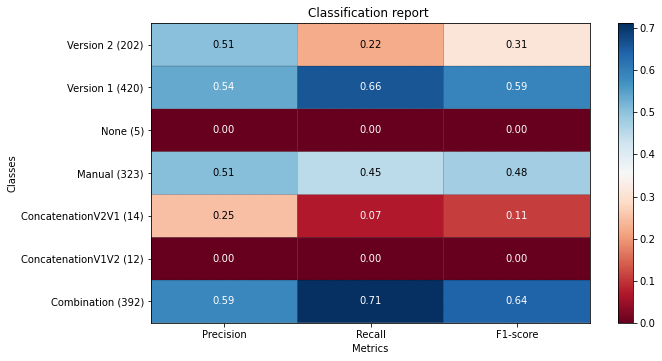

In [17]:
display(project.get_scores_df())
display(display(classifier_utils.plot_classification_report(project.scores)))

### Tunning hyperparameters (TODO)

# Tunned algorithms comparison (TODO)

In [ ]:
import importlib
importlib.reload(classifier_utils)
                 
# setup the algorithms with the desired parameters
algorithms = {}
algorithms['sklearn-decisionTree'] = DecisionTreeClassifier(min_samples_split=5, random_state=99)
# algorithms['sklearn-adaboost'] = AdaBoostClassifier(n_estimators=100, random_state=99)
algorithms['sklearn-randomForest'] = RandomForestClassifier(random_state=99)
# algorithms['xgBoost-randomForest'] = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')


results = []
for project in projects:
    for algorithm_name, algorithm in algorithms.items():
        row = []
        project_results = classifier_utils.evaluate_project(project, non_features_columns, algorithm)
        result = project_results.results
        precision = result.iloc[0]['precision']
        recall = result.iloc[0]['recall']
        f1_score = result.iloc[0]['f1-score']
        accuracy = result.iloc[0]['accuracy']
        majority_class = result.iloc[0]['baseline (majority)']
        improvement = result.iloc[0]['improvement']
        row = [project, algorithm_name, precision, recall, f1_score, accuracy, majority_class, improvement]
        results.append(row)
    
results = pd.DataFrame(results, columns=['project', 'algorithm', 'precision', 'recall', 'f1-score', 'accuracy', 'baseline (majority)', 'improvement'])
results.sort_values('improvement', ascending=False)
# print(results)
# pd.concat(results, ignore_index=True)